In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg

%matplotlib inline 
%reload_ext autoreload 
%autoreload 2

In [57]:
# import data 
#db = psycopg.connect(dbname='web_performance_analysis')
db = psycopg.connect(dbname='web_dns_analysis')
cursor = db.cursor()
#res = cursor.execute("SELECT dns, number_queried_servers  FROM websites ORDER BY number_queried_servers DESC LIMIT 50")
#print(cursor.fetchall())

# import data 
resolvers_df = pd.read_sql_query("SELECT * FROM resolvers", db)
resolver_measurements_df = pd.read_sql_query("SELECT * FROM resolver_measurement", db)
#resolver_measurements_df = pd.read_sql_query("SELECT * FROM resolver_measurement WHERE warm_up=False", db)
#resolver_measurements_df = pd.read_sql_query("SELECT * FROM resolver_measurement WHERE warm_up=False AND _id > 3627", db)
#2. MEASUREMENT _id > 3627


/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/577348404.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  resolvers_df = pd.read_sql_query("SELECT * FROM resolvers", db)
/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/577348404.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  resolver_measurements_df = pd.read_sql_query("SELECT * FROM resolver_measurement", db)


In [30]:
pd.read_sql_query("SELECT * FROM resolver_measurement WHERE warm_up=True AND protocol='quic' AND _id > 3627", db)

/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/323398275.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("SELECT * FROM resolver_measurement WHERE warm_up=True AND protocol='quic' AND _id > 3627", db)


,rtt,total_time,round_trips,warm_up,rtt0,session_resumption,raw_data,_id,resolver_id,protocol
0,3546,22308860,6,True,False,False,"[{""queries"":[{""id"":29437,""response"":false,""opc...",3642,274,quic
1,-1,604144381,-1,True,False,False,"[{""queries"":[{""id"":25353,""response"":false,""opc...",3645,276,quic
2,16852,49017985,3,True,False,False,"[{""queries"":[{""id"":17733,""response"":false,""opc...",3654,285,quic
3,304354,539250281,2,True,False,False,"[{""queries"":[{""id"":63706,""response"":false,""opc...",3656,288,quic
4,22787,62337414,3,True,False,False,"[{""queries"":[{""id"":38923,""response"":false,""opc...",3660,292,quic
...,...,...,...,...,...,...,...,...,...,...
1041,14634,59951917,4,True,False,False,"[{""queries"":[{""id"":54110,""response"":false,""opc...",6485,3448,quic
1042,18688,762429542,41,True,False,False,"[{""queries"":[{""id"":49439,""response"":false,""opc...",6489,3453,quic
1043,15063,62477227,4,True,False,False,"[{""queries"":[{""id"":38529,""response"":false,""opc...",6493,3458,quic
1044,14983,65474828,4,True,False,False,"[{""queries"":[{""id"":15479,""response"":false,""opc...",6495,3461,quic


In [31]:
resolvers_df

,_id,host,protocol,port,rtt0,session_resumption,serv_fail_rtt0,unreliable
0,2800,wpo5jx10wn-vddkzcav.onthewifi.com.,quic,853,True,True,False,False
1,3952,dns.pcr.dog.,udp,53,False,False,False,False
2,3953,dns.pcr.dog.,quic,853,False,True,False,False
3,5266,dns.dedsec.cc.,udp,53,False,False,False,False
4,274,dns.nextdns.io,quic,853,False,False,False,False
...,...,...,...,...,...,...,...,...
3236,3398,89.58.10.228,udp,53,False,False,False,False
3237,3399,23.94.221.108,udp,53,False,False,False,False
3238,3400,45.13.38.209,udp,53,False,False,False,False
3239,3401,103.123.108.197,udp,53,False,False,False,False


In [15]:
resolver_measurements_df

,rtt,total_time,round_trips,warm_up,rtt0,session_resumption,raw_data,_id,resolver_id,protocol
0,3546,22308860,5,False,False,False,"[{""queries"":[{""id"":65164,""response"":false,""opc...",3643,274,quic
1,13259,17055968,1,False,False,False,"[{""queries"":[{""id"":55896,""response"":false,""opc...",3647,278,udp
2,11749,17308381,1,False,False,False,"[{""queries"":[{""id"":64954,""response"":false,""opc...",3649,280,udp
3,21130,20781399,1,False,False,False,"[{""queries"":[{""id"":11476,""response"":false,""opc...",3651,282,udp
4,3629,11735512,3,False,False,False,"[{""queries"":[{""id"":13891,""response"":false,""opc...",3652,283,udp
...,...,...,...,...,...,...,...,...,...,...
1521,21813,21364423,1,False,False,False,"[{""queries"":[{""id"":8847,""response"":false,""opco...",6505,3474,udp
1522,20999,22847594,1,False,False,False,"[{""queries"":[{""id"":28313,""response"":false,""opc...",6506,3475,udp
1523,18278,15818957,1,False,False,False,"[{""queries"":[{""id"":54431,""response"":false,""opc...",6507,3476,udp
1524,15099,18790730,1,False,False,False,"[{""queries"":[{""id"":33431,""response"":false,""opc...",6508,3477,udp


In [58]:
# total number of resolvers 
cursor.execute("SELECT COUNT(*) FROM resolvers")
operational_resolvers = cursor.fetchone()[0]
print("potential resolvers: 3576") # from log file of experiment
print("operational resolvers on standard ports: ", operational_resolvers)

# number per protocol 
cursor.execute("SELECT COUNT(*) FROM resolvers WHERE protocol='quic'")
quic_resolvers = cursor.fetchone()[0]
print("QUIC resolvers: ", quic_resolvers)
cursor.execute("SELECT COUNT(*) FROM resolvers WHERE protocol='h3'")
h3_resolvers = cursor.fetchone()[0]
print("H3 resolvers: ", h3_resolvers)
cursor.execute("SELECT COUNT(*) FROM resolvers WHERE protocol='udp'")
udp_resolvers = cursor.fetchone()[0]
print("UDP resolvers: ", udp_resolvers)

# resolvers supporting several protocols
# all, UDP+QUIC, UDP+H3, H3+QUIC
quic_df = pd.read_sql_query("SELECT host FROM resolvers WHERE protocol='quic'", db)
quic_df['quic'] = True
udp_df = pd.read_sql_query("SELECT host FROM resolvers WHERE protocol='udp'", db)
udp_df['udp'] = True
h3_df = pd.read_sql_query("SELECT host FROM resolvers WHERE protocol='h3'", db)
h3_df['h3'] = True

quic_udp_df = pd.merge(quic_df, udp_df, how='inner', on='host')
quic_h3_df = pd.merge(quic_df, h3_df, how='inner', on='host')
h3_udp_df = pd.merge(h3_df, udp_df, how='inner', on='host')

quic_udp_h3_df = pd.merge(quic_h3_df, udp_df, how='inner', on='host')

print("resolvers supporting UDP & QUIC: ", quic_udp_df.shape[0])
print("resolvers supporting H3 & QUIC: ", quic_h3_df.shape[0])
print("resolvers supporting UDP & H3: ", h3_udp_df.shape[0])

print("resolvers supporting UDP, H3 & QUIC: ", quic_udp_h3_df.shape[0])




potential resolvers: 3576
operational resolvers on standard ports:  3241
QUIC resolvers:  1114
H3 resolvers:  556
UDP resolvers:  1571
resolvers supporting UDP & QUIC:  888
resolvers supporting H3 & QUIC:  493
resolvers supporting UDP & H3:  475
resolvers supporting UDP, H3 & QUIC:  468


/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/1132733753.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  quic_df = pd.read_sql_query("SELECT host FROM resolvers WHERE protocol='quic'", db)
/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/1132733753.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  udp_df = pd.read_sql_query("SELECT host FROM resolvers WHERE protocol='udp'", db)
/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/1132733753.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider

In [ ]:
quic_udp_h3_df

In [59]:
# serv fail 0-RTT for H3 and QUIC
cursor.execute("SELECT COUNT(*) FROM resolvers WHERE protocol='quic' AND serv_fail_rtt0=True")
serv_fail_quic_resolvers = cursor.fetchone()[0]
print(serv_fail_quic_resolvers, "/", quic_resolvers, " DoQ resolvers failed when 0-RTT support is enabled on client side")

cursor.execute("SELECT COUNT(*) FROM resolvers WHERE protocol='h3' AND serv_fail_rtt0=True")
serv_fail_h3_resolvers = cursor.fetchone()[0]
print(serv_fail_h3_resolvers, "/", h3_resolvers, "DoH3 resolvers failed when 0-RTT support is enabled on client side")

# support 0-RTT for H3 and QUIC
cursor.execute("SELECT COUNT(*) FROM resolvers WHERE protocol='quic' AND rtt0=True")
rtt0_quic_resolvers = cursor.fetchone()[0]
print(rtt0_quic_resolvers, "/", quic_resolvers, " DoQ resolvers support 0-RTT")

cursor.execute("SELECT COUNT(*) FROM resolvers WHERE protocol='h3' AND rtt0=True")
rtt0_h3_resolvers = cursor.fetchone()[0]
print(rtt0_h3_resolvers, "/", h3_resolvers, " DoH3 resolvers support 0-RTT")

# suppport session resumption for H3 and QUIC
cursor.execute("SELECT COUNT(*) FROM resolvers WHERE protocol='quic' AND session_resumption=True")
session_resumption_quic_resolvers = cursor.fetchone()[0]
print(session_resumption_quic_resolvers, "/", quic_resolvers, " DoQ resolvers support session resumption")

cursor.execute("SELECT COUNT(*) FROM resolvers WHERE protocol='h3' AND session_resumption=True")
session_resumption_h3_resolvers = cursor.fetchone()[0]
print(session_resumption_h3_resolvers, "/", h3_resolvers, " DoH3 resolvers support session resumption")


# unreliable flag per protocol
cursor.execute("SELECT COUNT(*) FROM resolvers WHERE protocol='quic' AND unreliable=True")
unreliable_quic_resolvers = cursor.fetchone()[0]
print(unreliable_quic_resolvers, "/", quic_resolvers, " DoQ resolvers are unreliable")

cursor.execute("SELECT COUNT(*) FROM resolvers WHERE protocol='udp' AND unreliable=True")
unreliable_udp_resolvers = cursor.fetchone()[0]
print(unreliable_udp_resolvers, "/", udp_resolvers, " DoU resolvers are unreliable")

cursor.execute("SELECT COUNT(*) FROM resolvers WHERE protocol='h3' AND unreliable=True")
unreliable_h3_resolvers = cursor.fetchone()[0]
print(unreliable_h3_resolvers, "/", h3_resolvers, " DoH3 resolvers are unreliable")


6 / 1114  DoQ resolvers failed when 0-RTT support is enabled on client side
544 / 556 DoH3 resolvers failed when 0-RTT support is enabled on client side
662 / 1114  DoQ resolvers support 0-RTT
68 / 556  DoH3 resolvers support 0-RTT
1039 / 1114  DoQ resolvers support session resumption
131 / 556  DoH3 resolvers support session resumption
2 / 1114  DoQ resolvers are unreliable
5 / 1571  DoU resolvers are unreliable
354 / 556  DoH3 resolvers are unreliable


In [18]:
# get fastest 10 resolvers overall protocols
fastest_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE resolver_measurement._id > 3627 ORDER by total_time ASC LIMIT 20", db)

print("------fastest resolvers------")
print(fastest_resolvers_df[['total_time', 'protocol', 'host']])

# get fastest 10 resolvers per protocol + supported features 
fastest_quic_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE resolver_measurement.protocol='quic' AND resolver_measurement._id > 3627 ORDER by total_time ASC LIMIT 10", db)
fastest_h3_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE resolver_measurement.protocol='h3' AND resolver_measurement._id > 3627 ORDER by total_time ASC LIMIT 10", db)
fastest_udp_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE resolver_measurement.protocol='udp' AND resolver_measurement._id > 3627 ORDER by total_time ASC LIMIT 10", db)

print("------fastest DoQ resolvers------")
print(fastest_quic_resolvers_df[['total_time', 'protocol', 'host']])
print("------fastest DoH3 resolvers------")
print(fastest_h3_resolvers_df[['total_time', 'protocol', 'host']])
print("------fastest DoU resolvers------")
print(fastest_udp_resolvers_df[['total_time', 'protocol', 'host']])

# get slowest 10 resolvers + supported features 
slowest_quic_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE resolver_measurement.protocol='quic' AND resolver_measurement._id > 3627 ORDER by total_time DESC LIMIT 10", db)
slowest_h3_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE resolver_measurement.protocol='h3' AND resolver_measurement._id > 3627 ORDER by total_time DESC LIMIT 10", db)
slowest_udp_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE resolver_measurement.protocol='udp' AND resolver_measurement._id > 3627 ORDER by total_time DESC LIMIT 10", db)

print("------slowest DoQ resolvers------")
print(slowest_quic_resolvers_df[['total_time', 'protocol', 'host']])
print("------slowest DoH3 resolvers------")
print(slowest_h3_resolvers_df[['total_time', 'protocol', 'host']])
print("------slowest DoU resolvers------")
print(slowest_udp_resolvers_df[['total_time', 'protocol', 'host']])


# median and mean overall, with session resumption and with 0-RTT
#warm_udp_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE resolver_measurement.protocol='udp' AND resolver_measurement.warm_up=True", db)
warm_udp_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE resolver_measurement.protocol='udp' AND resolver_measurement._id > 3627", db)

warm_quic_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE resolver_measurement.protocol='quic' AND resolver_measurement.warm_up=True AND resolver_measurement._id > 3627", db)
warm_h3_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE resolver_measurement.protocol='h3' AND resolver_measurement.warm_up=True AND resolver_measurement._id > 3627", db)

print("------statistics DoU resolvers------")
print("mean: ", warm_udp_resolvers_df['total_time'].mean())
print("median: ", warm_udp_resolvers_df['total_time'].median())

print("------statistics DoQ resolvers------")
print("mean: ", warm_quic_resolvers_df['total_time'].mean())
print("median: ", warm_quic_resolvers_df['total_time'].median())
print("------statistics DoH3 resolvers------")
print("mean: ", warm_h3_resolvers_df['total_time'].mean())
print("median: ", warm_h3_resolvers_df['total_time'].median())

warm_rtt0_quic_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE resolver_measurement.protocol='quic' AND resolver_measurement.warm_up=True AND resolvers.rtt0=True AND resolver_measurement._id > 3627", db)

print("------statistics DoQ 0-RTT resolvers------")
print("mean: ", warm_rtt0_quic_resolvers_df['total_time'].mean())
print("median: ", warm_rtt0_quic_resolvers_df['total_time'].median())
#print("------statistics DoH3 resolvers------")
#print(warm_h3_resolvers_df.desribe())


/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/2513909060.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fastest_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE resolver_measurement._id > 3627 ORDER by total_time ASC LIMIT 20", db)


------fastest resolvers------
    total_time protocol protocol                              host
0      4195968      udp      udp                 dns.leif.digital.
1      4269658      udp      udp      adguard01.server-schwabe.de.
2      4391768      udp      udp                       khome.site.
3      4415664      udp      udp                 adguard.pggns.de.
4      4699199      udp      udp                     dns.kla44.de.
5      4740968      udp      udp           adguardhome.favrep.ovh.
6      5026967      udp      udp       security.cloudflare-dns.com
7     11334665      udp      udp  adguard.public.netmasc.services.
8     11735512      udp      udp         family.cloudflare-dns.com
9     13616229      udp      udp                    89.163.155.202
10    14389762      udp      udp                    kunststaub.fm.
11    15066974      udp      udp            shield.sossong.bayern.
12    15130471      udp      udp                      94.140.14.59
13    15161273      udp      udp

/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/2513909060.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fastest_quic_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE resolver_measurement.protocol='quic' AND resolver_measurement._id > 3627 ORDER by total_time ASC LIMIT 10", db)
/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/2513909060.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fastest_h3_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE reso

------statistics DoU resolvers------
mean:  91962632.07534246
median:  30764072.0
------statistics DoQ resolvers------
mean:  193844204.76959848
median:  66332450.0
------statistics DoH3 resolvers------
mean:  1213439707.7811449
median:  2000504231.0
------statistics DoQ 0-RTT resolvers------
mean:  102852941.27190332
median:  54720871.0


/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/2513909060.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  warm_h3_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE resolver_measurement.protocol='h3' AND resolver_measurement.warm_up=True AND resolver_measurement._id > 3627", db)
/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/2513909060.py:50: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  warm_rtt0_quic_resolvers_df = pd.read_sql_query("SELECT * FROM resolver_measurement INNER JOIN resolvers ON resolvers._id=resolver_measurement.resolver_id WHERE 

In [21]:
warm_h3_resolvers_df

,rtt,total_time,round_trips,warm_up,rtt0,session_resumption,raw_data,_id,resolver_id,protocol,_id,host,protocol,port,rtt0,session_resumption,serv_fail_rtt0,unreliable
0,16273,58201759,4,True,False,False,"[{""queries"":[{""id"":53483,""response"":false,""opc...",5950,2850,h3,2850,fp5oibtmvy.dns.controld.com.,h3,443,True,True,True,False
1,12895,475951953,37,True,False,False,"[{""queries"":[{""id"":14568,""response"":false,""opc...",4245,947,h3,947,dns.linlin00.top.,h3,443,False,True,True,False
2,12603,177235269,14,True,False,False,"[{""queries"":[{""id"":21578,""response"":false,""opc...",3970,3831,h3,3831,adguard.sparshbajaj.me.,h3,443,False,True,True,False
3,12991,581878983,45,True,False,False,"[{""queries"":[{""id"":34421,""response"":false,""opc...",4386,4287,h3,4287,adguard.aavesh.dev.,h3,443,False,True,True,False
4,14904,2000616114,134,True,False,False,"[{""queries"":[{""id"":27256,""response"":false,""opc...",3945,621,h3,621,ba2ae1d6.d.adguard-dns.com.,h3,443,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,17976,2001104455,111,True,False,False,"[{""queries"":[{""id"":37209,""response"":false,""opc...",6281,3224,h3,3224,312fd9e9.d.adguard-dns.com.,h3,443,False,False,True,True
293,14864,2000591681,135,True,False,False,"[{""queries"":[{""id"":32708,""response"":false,""opc...",6304,3255,h3,3255,a8981a43.d.adguard-dns.com.,h3,443,False,False,True,False
294,14814,2000647843,135,True,False,False,"[{""queries"":[{""id"":22067,""response"":false,""opc...",6319,3270,h3,3270,26ff3c12.d.adguard-dns.com.,h3,443,False,False,True,False
295,14944,2000521493,134,True,False,False,"[{""queries"":[{""id"":60244,""response"":false,""opc...",6333,3284,h3,3284,72b9e447.d.adguard-dns.com.,h3,443,False,False,True,False


In [ ]:
resolver_measurements_df

In [ ]:
full_quic_udp_h3_df

In [ ]:

#TODO Showing lines for UDP, DoQ 0-RTT, DoQ Session Resumption ohne 0-RTT, DoH mit Session Resumption, DoQ ohne Session Resumption, DoH ohne Session Resumption 
#TODO see Bildschirmfoto 2024-08-20 um 22.11.38 in Diagramme

In [60]:
# get _ids for hosts supporting all protocols
full_quic_df = pd.read_sql_query("SELECT host,_id FROM resolvers WHERE protocol='quic'", db)
full_quic_df = full_quic_df.rename(columns={'_id': 'quic_id'})

full_udp_df = pd.read_sql_query("SELECT host,_id FROM resolvers WHERE protocol='udp'", db)
full_udp_df = full_udp_df.rename(columns={'_id': 'udp_id'})

full_h3_df = pd.read_sql_query("SELECT host,_id FROM resolvers WHERE protocol='h3'", db)
full_h3_df = full_h3_df.rename(columns={'_id': 'h3_id'})

full_quic_udp_df = pd.merge(full_quic_df, full_udp_df, how='inner', on='host')

full_quic_udp_h3_df = pd.merge(full_quic_udp_df, full_h3_df, how='inner', on='host')


# filter measurements based on _id list
#quic_intersect_measurements = resolver_measurements_df[resolver_measurements_df['resolver_id'].isin(full_quic_udp_h3_df['quic_id'])]
#h3_intersect_measurements = resolver_measurements_df[resolver_measurements_df['resolver_id'].isin(full_quic_udp_h3_df['h3_id'])]
#udp_intersect_measurements = resolver_measurements_df[resolver_measurements_df['resolver_id'].isin(full_quic_udp_h3_df['udp_id'])]

# filter and replace resolver_id with host column in measurements
quic_intersect_measurements = pd.merge(full_quic_udp_h3_df, resolver_measurements_df, how='inner', left_on='quic_id', right_on='resolver_id')
h3_intersect_measurements = pd.merge(full_quic_udp_h3_df, resolver_measurements_df, how='inner', left_on='h3_id', right_on='resolver_id')
udp_intersect_measurements = pd.merge(full_quic_udp_h3_df, resolver_measurements_df, how='inner', left_on='udp_id', right_on='resolver_id')

# convert ns to ms
quic_intersect_measurements['total_time'] = quic_intersect_measurements['total_time'].div(1000000)
h3_intersect_measurements['total_time'] = h3_intersect_measurements['total_time'].div(1000000)
udp_intersect_measurements['total_time'] = udp_intersect_measurements['total_time'].div(1000000)


# get fastest 10 resolvers + supported features 
print("------fastest DoQ resolvers------")
print(quic_intersect_measurements.sort_values(by=['total_time'], ascending=True).drop_duplicates('host', keep='first').head(10)[['total_time', 'host']])
print("------fastest DoH3 resolvers------")
print(h3_intersect_measurements.sort_values(by=['total_time'], ascending=True).drop_duplicates('host', keep='first').head(10)[['total_time', 'host']])
print("------fastest DoU resolvers------")
print(udp_intersect_measurements.sort_values(by=['total_time'], ascending=True).drop_duplicates('host', keep='first').head(10)[['total_time', 'host']])

# get slowest 10 resolvers + supported features 
print("------slowest DoQ resolvers------")
print(quic_intersect_measurements.sort_values(by=['total_time'], ascending=False).drop_duplicates('host', keep='first').head(10)[['total_time', 'host']])
print("------slowest DoH3 resolvers------")
print(h3_intersect_measurements.sort_values(by=['total_time'], ascending=False).drop_duplicates('host', keep='first').head(10)[['total_time', 'host']])
print("------slowest DoU resolvers------")
print(udp_intersect_measurements.sort_values(by=['total_time'], ascending=False).drop_duplicates('host', keep='first').head(10)[['total_time', 'host']])

# average, median per protocol
print("------statistics DoU resolvers------")
print("mean: ", udp_intersect_measurements.loc[udp_intersect_measurements['warm_up'] == False]['total_time'].mean())
print("median: ", udp_intersect_measurements.loc[udp_intersect_measurements['warm_up'] == False]['total_time'].median())

print("------statistics DoQ resolvers------")
print("mean: ", quic_intersect_measurements.loc[quic_intersect_measurements['warm_up'] == False]['total_time'].mean())
print("median: ", quic_intersect_measurements.loc[quic_intersect_measurements['warm_up'] == False]['total_time'].median())
print("------statistics DoH3 resolvers------")
print("mean: ", h3_intersect_measurements.loc[h3_intersect_measurements['warm_up'] == False]['total_time'].mean())
print("median: ", h3_intersect_measurements.loc[h3_intersect_measurements['warm_up'] == False]['total_time'].median())


# top 10 and avg, median for resolvers supporting all protocols 
#intersect_measurements = pd.concat( [udp_intersect_measurements, quic_intersect_measurements, h3_intersect_measurements],axis=0,ignore_index=True)
#intersect_measurements = intersect_measurements.groupby('host').sum().div(3)
intermediate_df = pd.merge(udp_intersect_measurements[['host', 'total_time']], quic_intersect_measurements[['host', 'total_time']], how='outer', on='host', suffixes=('_udp', '_quic'))
intermediate_df = pd.merge(h3_intersect_measurements[['host', 'total_time']], intermediate_df, how='outer', on='host')
intermediate_df = intermediate_df.rename(columns={'total_time': 'total_time_h3'})

# displaying df shows, that there are NaN rows from resolvers which were unreliable during the measurement
cleaned_intersect_df = intermediate_df.dropna()
cleaned_intersect_df['total_time_avg'] = cleaned_intersect_df[['total_time_h3', 'total_time_udp', 'total_time_quic']].sum(axis=1).div(3)



print("------fastest resolvers------")
print(cleaned_intersect_df.sort_values(by=['total_time_avg'], ascending=True).drop_duplicates('host', keep='first').head(100).to_string())
print("------slowest resolvers------")
print(cleaned_intersect_df.sort_values(by=['total_time_avg'], ascending=False).drop_duplicates('host', keep='first').head(10))

print("------statistics resolvers interset subset------")
print("mean: ", cleaned_intersect_df['total_time_avg'].mean())
print("median: ", cleaned_intersect_df['total_time_avg'].median())


#quic_udp_h3_df
# --> Daraus die besten auswählen
# vorher nochmal Messungg wieederholen mt RTT0 disabled? --> Sonst nicht vergleichbar

# Warum DoE so viel langsamer?
#--> Encryption Zeit?
#--> Zertifikatscheck?
#--> Übertragung der größeren Datenpakete?
#--> nochmal prüfen mitt q vom Server b UDP tatsächlich so schnell sein kann?

#--> für cloudflare mal schauen?


------fastest DoQ resolvers------
     total_time                         host
905   45.282625  c267c1da.d.adguard-dns.com.
58    45.416369  16e973ee.d.adguard-dns.com.
944   45.540602  d78aab2f.d.adguard-dns.com.
113   45.554091  8ebcb4d7.d.adguard-dns.com.
667   45.590275  3a4e2d35.d.adguard-dns.com.
202   45.594991  3cbc7468.d.adguard-dns.com.
896   45.639022  f6a26293.d.adguard-dns.com.
704   45.697392  f3d66982.d.adguard-dns.com.
317   45.703000  3f1e2cd2.d.adguard-dns.com.
690   45.713919  4689fecf.d.adguard-dns.com.
------fastest DoH3 resolvers------
     total_time                           host
450   49.856949   dopn3plrkx.dns.controld.com.
68    50.465944  2b3ww24ojel.dns.controld.com.
388   50.580526  1cn0ze3jb2w.dns.controld.com.
285   50.660732   2q0mwmb7y1.dns.controld.com.
376   50.736168   ejcx2klons.dns.controld.com.
225   50.815551  1keqgd13hha.dns.controld.com.
150   50.876754   3v9vwp7apu.dns.controld.com.
24    50.912117   3oumwsh6sy.dns.controld.com.
482   51.0088

/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/1742325433.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  full_quic_df = pd.read_sql_query("SELECT host,_id FROM resolvers WHERE protocol='quic'", db)
/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/1742325433.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  full_udp_df = pd.read_sql_query("SELECT host,_id FROM resolvers WHERE protocol='udp'", db)
/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/1742325433.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. 

In [28]:
quic_intersect_measurements

,host,quic_id,udp_id,h3_id,rtt,total_time,round_trips,warm_up,rtt0,session_resumption,raw_data,_id,resolver_id,protocol
0,ab795a22.d.adguard-dns.com.,2610,2609,2611,15620,46.881277,7,False,False,False,"[{""queries"":[{""id"":57507,""response"":false,""opc...",5740,2610,quic
1,e9618ecc.d.adguard-dns.com.,2938,2937,2939,16557,47.637941,17,False,False,False,"[{""queries"":[{""id"":25016,""response"":false,""opc...",6033,2938,quic
2,51fa9c8e.d.adguard-dns.com.,3275,3274,3276,14861,63.033252,4,False,False,False,"[{""queries"":[{""id"":46220,""response"":false,""opc...",6326,3275,quic


In [35]:
pd.merge(udp_intersect_measurements[['host', 'total_time']], quic_intersect_measurements[['host', 'total_time']], how='inner', on='host', suffixes=('_udp', '_quic'))

,host,total_time_udp,total_time_quic
0,6358cbd1.d.adguard-dns.com.,19.441161,70.785894
1,6358cbd1.d.adguard-dns.com.,20.644627,70.785894
2,9e912e75.d.adguard-dns.com.,18.674609,78.953139
3,9e912e75.d.adguard-dns.com.,15.945488,78.953139
4,33d9ee6d.d.adguard-dns.com.,23.842584,68.548079
...,...,...,...
555,a8981a43.d.adguard-dns.com.,16.126053,76.541672
556,de1b71e5.d.adguard-dns.com.,19.122597,93.774256
557,de1b71e5.d.adguard-dns.com.,15.650025,93.774256
558,94.140.14.141,17.750336,78.473783


In [24]:
full_quic_udp_h3_df

,host,quic_id,udp_id,h3_id
0,6358cbd1.d.adguard-dns.com.,783,782,784
1,dns-family.adguard.com,295,294,296
2,9e912e75.d.adguard-dns.com.,1482,1481,1483
3,d27161a7.d.adguard-dns.com.,2122,2121,2123
4,33d9ee6d.d.adguard-dns.com.,2125,2124,2126
...,...,...,...,...
463,a8981a43.d.adguard-dns.com.,3254,3253,3255
464,de1b71e5.d.adguard-dns.com.,3261,3260,3262
465,26ff3c12.d.adguard-dns.com.,3269,3268,3270
466,72b9e447.d.adguard-dns.com.,3283,3282,3284


<Axes: xlabel='total_time', ylabel='Proportion'>

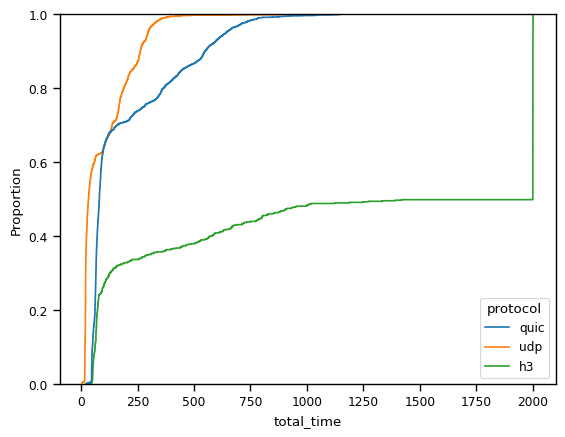

In [61]:
# Diagrams with seaborn

# UDP total time 
cleaned_resolver_measurements_df = resolver_measurements_df.dropna()
cleaned_resolver_measurements_df['total_time']= cleaned_resolver_measurements_df['total_time'].div(1000000)
#cleaned_resolver_measurements_df = cleaned_resolver_measurements_df[cleaned_resolver_measurements_df['warm_up'] == False]


sns.ecdfplot(data=cleaned_resolver_measurements_df, x="total_time", hue="protocol")

In [65]:
resolver_measurements_df_2 = pd.read_sql_query("SELECT * FROM resolver_measurement", db)
resolver_measurements_df_2[resolver_measurements_df_2['session_resumption'] == True]

/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/3970157433.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  resolver_measurements_df_2 = pd.read_sql_query("SELECT * FROM resolver_measurement", db)


,rtt,total_time,round_trips,warm_up,rtt0,session_resumption,raw_data,_id,resolver_id,protocol


In [66]:
resolver_measurements_df_2

,rtt,total_time,round_trips,warm_up,rtt0,session_resumption,raw_data,_id,resolver_id,protocol
0,15467,75815641,5,True,False,False,"[{""queries"":[{""id"":14277,""response"":false,""opc...",335,274,quic
1,233479,345807970,1,False,False,False,"[{""queries"":[{""id"":402,""response"":false,""opcod...",2973,2847,udp
2,15467,75815641,1,False,False,False,"[{""queries"":[{""id"":63185,""response"":false,""opc...",336,274,quic
3,15467,61183274,4,True,False,False,"[{""queries"":[{""id"":61182,""response"":false,""opc...",337,275,h3
4,15467,61183274,1,False,False,False,"[{""queries"":[{""id"":3591,""response"":false,""opco...",338,275,h3
...,...,...,...,...,...,...,...,...,...,...
6156,21813,21364423,1,False,False,False,"[{""queries"":[{""id"":8847,""response"":false,""opco...",6505,3474,udp
6157,20999,22847594,1,False,False,False,"[{""queries"":[{""id"":28313,""response"":false,""opc...",6506,3475,udp
6158,18278,15818957,1,False,False,False,"[{""queries"":[{""id"":54431,""response"":false,""opc...",6507,3476,udp
6159,15099,18790730,1,False,False,False,"[{""queries"":[{""id"":33431,""response"":false,""opc...",6508,3477,udp


In [48]:
cleaned_resolver_measurements_df

,rtt,total_time,round_trips,warm_up,rtt0,session_resumption,raw_data,_id,resolver_id,protocol
0,233479,345.807970,1,False,False,False,"[{""queries"":[{""id"":402,""response"":false,""opcod...",2973,2847,udp
1,15467,75.815641,1,False,False,False,"[{""queries"":[{""id"":63185,""response"":false,""opc...",336,274,quic
2,15467,61.183274,1,False,False,False,"[{""queries"":[{""id"":3591,""response"":false,""opco...",338,275,h3
3,11724,18.291581,2,False,False,False,"[{""queries"":[{""id"":54358,""response"":false,""opc...",341,278,udp
4,11400,17.966665,2,False,False,False,"[{""queries"":[{""id"":35730,""response"":false,""opc...",343,280,udp
...,...,...,...,...,...,...,...,...,...,...
3445,21813,21.364423,1,False,False,False,"[{""queries"":[{""id"":8847,""response"":false,""opco...",6505,3474,udp
3446,20999,22.847594,1,False,False,False,"[{""queries"":[{""id"":28313,""response"":false,""opc...",6506,3475,udp
3447,18278,15.818957,1,False,False,False,"[{""queries"":[{""id"":54431,""response"":false,""opc...",6507,3476,udp
3448,15099,18.790730,1,False,False,False,"[{""queries"":[{""id"":33431,""response"":false,""opc...",6508,3477,udp


In [63]:
cleaned_resolver_measurements_df_detailed[cleaned_resolver_measurements_df_detailed['session_resumption'] == True]

,rtt,total_time,round_trips,warm_up,rtt0,session_resumption,raw_data,_id,resolver_id,protocol


[Text(0.5, 0, 'request completion time in ms')]

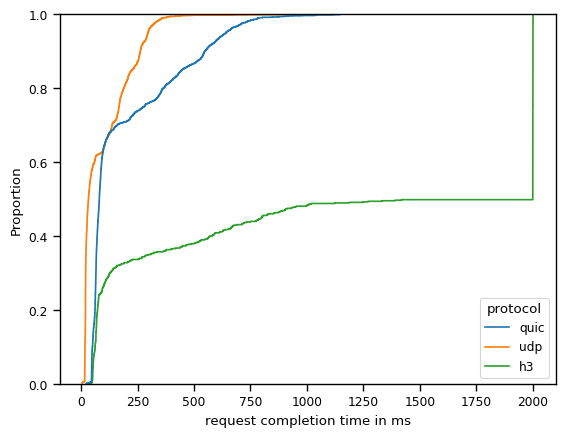

In [62]:
def changeProtocol(row): 
    if row['rtt0']:
        return row['protocol'] + ' 0-RTT'
    elif row['session_resumption']:
        return row['protocol'] + ' sesssion resumption'
    else:
        return row['protocol']

cleaned_resolver_measurements_df_detailed = cleaned_resolver_measurements_df
cleaned_resolver_measurements_df_detailed['protocol'] = cleaned_resolver_measurements_df_detailed.apply(lambda x:changeProtocol(x), axis=1)
sns.set_context("paper")
fig = sns.ecdfplot(data=cleaned_resolver_measurements_df_detailed, x="total_time", hue="protocol")
fig.set(xlabel='request completion time in ms')


/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_4617/297344951.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


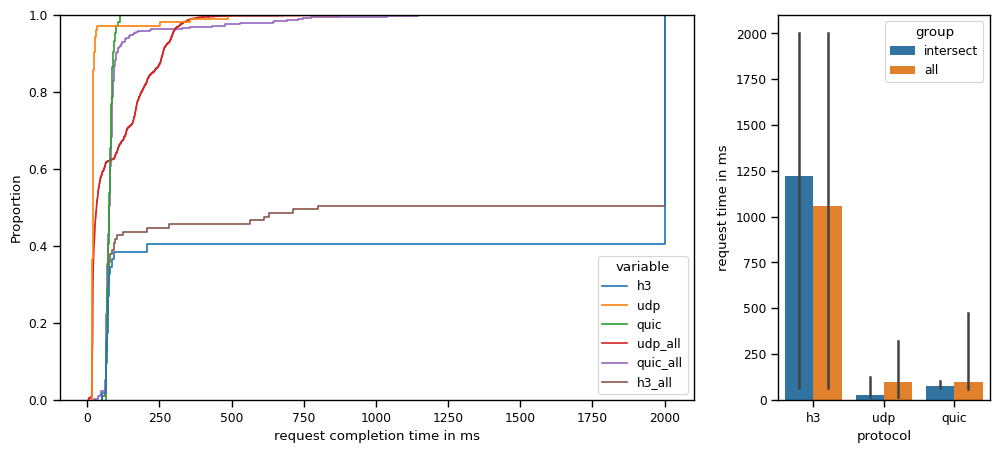

In [52]:
# clean from unreliable hosts
resolvers_df_reliable = resolvers_df[resolvers_df['unreliable'] == False]

#cleaned_intersect_df_melt = cleaned_intersect_df[cleaned_intersect_df['host'].isin(resolvers_df_reliable['host'])]


cleaned_intersect_df_melt = cleaned_intersect_df.rename(columns={'total_time_h3': 'h3', 'total_time_udp': 'udp', 'total_time_quic': 'quic'})
# Convert the dataframe from wide to long format 
cleaned_intersect_df_melt = pd.melt(cleaned_intersect_df_melt,value_vars=['h3','udp','quic'])

cleaned_resolver_measurements_df = resolver_measurements_df[resolver_measurements_df['warm_up'] == False]

#TODO merge funktioniert wie erwartet (eigentlich muss nur host miti )
cleaned_resolver_measurements_df = pd.merge(cleaned_resolver_measurements_df, resolvers_df_reliable, how='inner', right_on='_id', left_on='resolver_id')
#cleaned_resolver_measurements_df = cleaned_resolver_measurements_df[cleaned_resolver_measurements_df['host'].isin(resolvers_df_reliable['host'])]

cleaned_resolver_measurements_df['total_time']= cleaned_resolver_measurements_df['total_time'].div(1000000)

# for bar plot hue column und beides mergen
# for cdf plot variable column neue Werte 'h3_all', 'quic_all', 'udp_all'
cdf_temp = cleaned_resolver_measurements_df[['protocol_x', 'total_time']]
cdf_temp = cdf_temp.rename(columns={'protocol_x': 'protocol'})
bar_temp = cdf_temp.copy(deep=True)

cdf_temp['protocol'] = cdf_temp['protocol'].map({'h3': 'h3_all', 'quic': 'quic_all', 'udp': 'udp_all'})

bar_temp['group'] = 'all'

cdf_temp = cdf_temp.rename(columns={'protocol': 'variable', 'total_time': 'value'})
cdf_resolver_measurements = pd.concat([cleaned_intersect_df_melt, cdf_temp],ignore_index=True)

cleaned_intersect_df_melt['group'] = 'intersect'

bar_temp = bar_temp.rename(columns={'protocol': 'variable', 'total_time': 'value'})
bar_resolver_measurements = pd.concat([cleaned_intersect_df_melt, bar_temp], ignore_index=True)



fig, ax =plt.subplots(1,2, gridspec_kw={'width_ratios': [3, 1]})
fig.set_size_inches(12, 5)
#sub_fig_1 = sns.ecdfplot(data=cleaned_intersect_df_melt, x="value", hue="variable", ax=ax[0])
sub_fig_1 = sns.ecdfplot(data=cdf_resolver_measurements, x="value", hue="variable", ax=ax[0])
sub_fig_1.set(xlabel='request completion time in ms')
#sub_fig_2 = sns.barplot(data=cleaned_intersect_df_melt, x="variable", y="value", ci="sd", ax=ax[1])
#sub_fig_2 = sns.barplot(data=bar_resolver_measurements, x="variable", y="value", hue='group', ci="sd", ax=ax[1])
sub_fig_2 = sns.barplot(data=bar_resolver_measurements, x="variable", y="value", hue='group', errorbar="pi", ax=ax[1])
sub_fig_2.set(xlabel='protocol', ylabel='request time in ms')
fig.show()




In [51]:
cdf_resolver_measurements

,variable,value
0,h3,2000.749281
1,h3,2000.749281
2,h3,72.477249
3,h3,72.477249
4,h3,72.276823
...,...,...
3755,udp_all,21.364423
3756,udp_all,22.847594
3757,udp_all,15.818957
3758,udp_all,18.790730


In [13]:
print("------statistics DoU resolvers------")
print("mean: ", cleaned_resolver_measurements_df.loc[cleaned_resolver_measurements_df['protocol_x'] == 'udp']['total_time'].mean())
print("median: ", cleaned_resolver_measurements_df.loc[cleaned_resolver_measurements_df['protocol_x'] == 'udp']['total_time'].median())

------statistics DoU resolvers------
mean:  99.3810104557377
median:  33.417801


In [12]:
cleaned_resolver_measurements_df


,rtt,total_time,round_trips,warm_up,rtt0_x,session_resumption_x,raw_data,_id_x,resolver_id,protocol_x,_id_y,host,protocol_y,port,rtt0_y,session_resumption_y,serv_fail_rtt0,unreliable
0,233479,345.807970,1,False,False,False,"[{""queries"":[{""id"":402,""response"":false,""opcod...",2973,2847,udp,2847,dns.eliv.kr.,udp,53,False,False,False,False
1,15467,75.815641,1,False,False,False,"[{""queries"":[{""id"":63185,""response"":false,""opc...",336,274,quic,274,dns.nextdns.io,quic,853,False,False,False,False
2,15467,61.183274,1,False,False,False,"[{""queries"":[{""id"":3591,""response"":false,""opco...",338,275,h3,275,dns.nextdns.io,h3,443,False,False,True,False
3,11724,18.291581,2,False,False,False,"[{""queries"":[{""id"":54358,""response"":false,""opc...",341,278,udp,278,dns.google,udp,53,False,False,False,False
4,11400,17.966665,2,False,False,False,"[{""queries"":[{""id"":35730,""response"":false,""opc...",343,280,udp,280,dns.google.com,udp,53,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,23277,26.638445,1,False,False,False,"[{""queries"":[{""id"":57001,""response"":false,""opc...",3621,3474,udp,3474,185.113.28.38,udp,53,False,False,False,False
1920,24530,29.432590,1,False,False,False,"[{""queries"":[{""id"":12275,""response"":false,""opc...",3622,3475,udp,3475,185.113.28.138,udp,53,False,False,False,False
1921,19128,17.319608,1,False,False,False,"[{""queries"":[{""id"":55811,""response"":false,""opc...",3623,3476,udp,3476,194.0.5.64,udp,53,False,False,False,False
1922,15446,18.436576,1,False,False,False,"[{""queries"":[{""id"":13936,""response"":false,""opc...",3624,3477,udp,3477,194.0.5.3,udp,53,False,False,False,False


/var/folders/gg/mshnyrc13_xds3zrlmd3_nkc0000gn/T/ipykernel_34480/2327650476.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=bar_resolver_measurements, x="variable", y="value", hue='group', ci="sd")


<Axes: xlabel='variable', ylabel='value'>

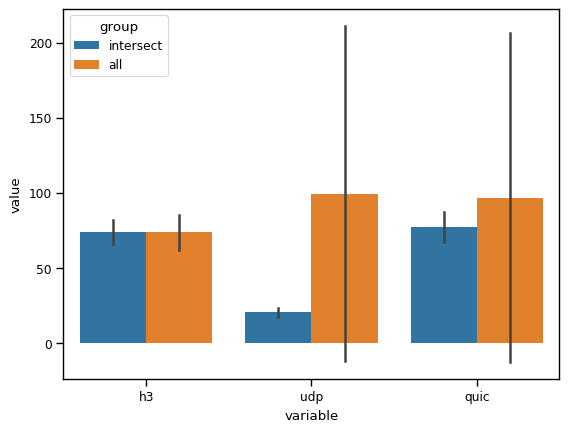

In [9]:
sns.barplot(data=bar_resolver_measurements, x="variable", y="value", hue='group', ci="sd")

In [ ]:
# rtt distribution 
# rtt0 --> in measurement table nicht gesetzt daher immer False
#TODO Check Fehler warm_up nicht gesetzt für DoQ? 


In [ ]:
db.rollback()

In [ ]:
# filter all cache warming queries out

actual_udp_measures_df = udp_measures_df.loc[udp_measures_df['cacheWarming'] == 0]
actual_quic_measures_df = quic_measures_df.loc[quic_measures_df['cacheWarming'] == 0]
actual_h3_measures_df = h3_measures_df.loc[h3_measures_df['cacheWarming'] == 0]

In [ ]:
# calculating delta times
pd.options.mode.chained_assignment = None # disabling warning because I don't care about efficiency here

# connectEnd -connectStart
actual_udp_measures_df['connectDuration'] = actual_udp_measures_df['connectEnd'] - actual_udp_measures_df['connectStart']
actual_quic_measures_df['connectDuration'] = actual_quic_measures_df['connectEnd'] - actual_quic_measures_df['connectStart']
actual_h3_measures_df['connectDuration'] = actual_h3_measures_df['connectEnd'] - actual_h3_measures_df['connectStart']

# domComplete - connectStart
actual_udp_measures_df['domCompleteDuration'] = actual_udp_measures_df['domComplete'] - actual_udp_measures_df['domainLookupStart']
actual_quic_measures_df['domCompleteDuration'] = actual_quic_measures_df['domComplete'] - actual_quic_measures_df['domainLookupStart']
actual_h3_measures_df['domCompleteDuration'] = actual_h3_measures_df['domComplete'] - actual_h3_measures_df['domainLookupStart']

# domainLookupEnd - domainLookupStart
actual_udp_measures_df['domainLookupDuration'] = actual_udp_measures_df['domainLookupEnd'] - actual_udp_measures_df['domainLookupStart']
actual_quic_measures_df['domainLookupDuration'] = actual_quic_measures_df['domainLookupEnd'] - actual_quic_measures_df['domainLookupStart']
actual_h3_measures_df['domainLookupDuration'] = actual_h3_measures_df['domainLookupEnd'] - actual_h3_measures_df['domainLookupStart']


# firstPaint - connectStart
actual_udp_measures_df['firstPaintDuration'] = actual_udp_measures_df['firstPaint'] - actual_udp_measures_df['domainLookupStart']
actual_quic_measures_df['firstPaintDuration'] = actual_quic_measures_df['firstPaint'] - actual_quic_measures_df['domainLookupStart']
actual_h3_measures_df['firstPaintDuration'] = actual_h3_measures_df['firstPaint'] - actual_h3_measures_df['domainLookupStart']


# firstContentfulPaint - connectStart
actual_udp_measures_df['firstContentfulPaintDuration'] = actual_udp_measures_df['firstContentfulPaint'] - actual_udp_measures_df['domainLookupStart']
actual_quic_measures_df['firstContentfulPaintDuration'] = actual_quic_measures_df['firstContentfulPaint'] - actual_quic_measures_df['domainLookupStart']
actual_h3_measures_df['firstContentfulPaintDuration'] = actual_h3_measures_df['firstContentfulPaint'] - actual_h3_measures_df['domainLookupStart']

# secureConnectionStart - connectStart
actual_udp_measures_df['secureConnectionDuration'] = actual_udp_measures_df['secureConnectionStart'] - actual_udp_measures_df['domainLookupStart']
actual_quic_measures_df['secureConnectionDuration'] = actual_quic_measures_df['secureConnectionStart'] - actual_quic_measures_df['domainLookupStart']
actual_h3_measures_df['secureConnectionDuration'] = actual_h3_measures_df['secureConnectionStart'] - actual_h3_measures_df['domainLookupStart']

# loadEventEnd - loadEventStart
actual_udp_measures_df['loadEventDuration'] = actual_udp_measures_df['loadEventEnd'] - actual_udp_measures_df['loadEventStart']
actual_quic_measures_df['loadEventDuration'] = actual_quic_measures_df['loadEventEnd'] - actual_quic_measures_df['loadEventStart']
actual_h3_measures_df['loadEventDuration'] = actual_h3_measures_df['loadEventEnd'] - actual_h3_measures_df['loadEventStart']

# domInteractive - connectStart
actual_udp_measures_df['domInteractiveDuration'] = actual_udp_measures_df['domInteractive'] - actual_udp_measures_df['domainLookupStart']
actual_quic_measures_df['domInteractiveDuration'] = actual_quic_measures_df['domInteractive'] - actual_quic_measures_df['domainLookupStart']
actual_h3_measures_df['domInteractiveDuration'] = actual_h3_measures_df['domInteractive'] - actual_h3_measures_df['domainLookupStart']

# domContentLoadedEventEnd - domContentLoadedEventStart
actual_udp_measures_df['domContentLoadedEventDuration'] = actual_udp_measures_df['domContentLoadedEventEnd'] - actual_udp_measures_df['domContentLoadedEventStart']
actual_quic_measures_df['domContentLoadedEventDuration'] = actual_quic_measures_df['domContentLoadedEventEnd'] - actual_quic_measures_df['domContentLoadedEventStart']
actual_h3_measures_df['domContentLoadedEventDuration'] = actual_h3_measures_df['domContentLoadedEventEnd'] - actual_h3_measures_df['domContentLoadedEventStart']


In [ ]:
# mergge dataframes 
frames = [actual_udp_measures_df, actual_quic_measures_df, actual_h3_measures_df]
data_df = pd.concat(frames)

In [ ]:
actual_udp_measures_df['domainLookupStart']

In [ ]:
# bar diagram showing median and mean for all columns above hue=protocol
sns.barplot(data=data_df, x="protocol", y="connectDuration", estimator=np.median)

In [ ]:
sns.barplot(data=data_df, x="protocol", y="domCompleteDuration", estimator=np.median)

In [ ]:
fig, ax =plt.subplots(1,3)
sns.barplot(data=data_df, x="protocol", y="connectDuration", estimator=np.median, ax=ax[0])
sns.barplot(data=data_df, x="protocol", y="domCompleteDuration", estimator=np.median, ax=ax[1])
sns.barplot(data=data_df, x="protocol", y="domainLookupDuration", estimator=np.median, ax=ax[2])
fig.show()


In [ ]:
fig, ax =plt.subplots(1,3)
sns.barplot(data=data_df, x="protocol", y="firstPaintDuration", estimator=np.median, ax=ax[0])
sns.barplot(data=data_df, x="protocol", y="firstContentfulPaintDuration", estimator=np.median, ax=ax[1])
sns.barplot(data=data_df, x="protocol", y="secureConnectionDuration", estimator=np.median, ax=ax[2])
fig.show()

In [ ]:
fig, ax =plt.subplots(1,3)
sns.barplot(data=data_df, x="protocol", y="loadEventDuration", estimator=np.median, ax=ax[0])
sns.barplot(data=data_df, x="protocol", y="domInteractiveDuration", estimator=np.median, ax=ax[1])
sns.barplot(data=data_df, x="protocol", y="domContentLoadedEventDuration", estimator=np.median, ax=ax[2])
fig.show()

In [ ]:
# categorization of websites 
# e.g. loading time of websites with 
    #many DNS requests, 
    #many objects, 
    #many bytes transferred, 
    #number of queried server, 
    #number of non-origin servers
    #mime types

In [ ]:
# TODO data missing: RTT (already in logs, but not in db), number of DNS requests made (should be number of queried servers?)
# see diagrams folder

In [ ]:
data_merged_df = data_df.merge(websites_df, left_on='domain', right_on='dns')

In [ ]:
data_merged_df

In [ ]:
# time needed for connection hue= protocol, x=connectDuration
sns.scatterplot(data=data_merged_df, x="number_objects_loaded", y="connectDuration", hue="protocol")

In [ ]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data=data_merged_df, x="number_objects_loaded", y="connectDuration", hue="protocol", ax=ax[0])
sns.scatterplot(data=data_merged_df, x="number_queried_servers", y="connectDuration", hue="protocol", ax=ax[1])
fig.show()

In [ ]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data=data_merged_df, x="connectDuration", y="number_mime_types", hue="protocol", ax=ax[0])
sns.scatterplot(data=data_merged_df, x="connectDuration", y="bytes_downladed", hue="protocol", ax=ax[1])
fig.show()

In [ ]:
db_udp.close()
db_quic.close()
db_h3.close()


In [ ]:
# import data 
db = sqlite3.connect('web-performance.db')
cursor = db.cursor()
cursor.execute("DELETE FROM measurements")
db.commit()
db.close()